# ch03.06. 기초통계 - 분포통계량
---
* 날짜: 2022.05.09
* 이름: 윤태우

## 학습내용
    - 백분위수, 사분위수
    - 왜도
    - 첨도

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  분포 통계
---

* 분포통계는 데이터의 위치나 모양을 확인

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```

* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [2]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.normal(0,1,1000)

* `a` 분포 그리기

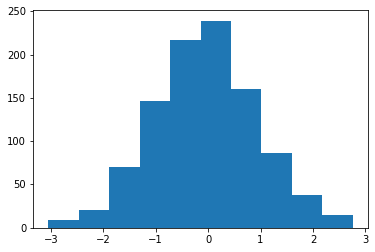

In [4]:
plt.hist(a)
plt.show()

### **| 백분위수와 사분위수**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-03.png?raw=true width=800>
</p>

```
np.percentile(x,  percent)
np.quantile(x, percent_ratio)
```

* 하위 10% 에 위치한 값 확인

In [10]:
# percentile 사용
print(np.percentile(a, 10))
# quantile 사용
print(np.quantile(a, 0.1))

-1.2991423253580128
-1.2991423253580128


* 하위 80% 에 위치한 값 확인

In [11]:
# percentile 사용
print(np.percentile(a, 80))
# quantile 사용
print(np.quantile(a, 0.8))

0.7883967913601156
0.7883967913601156


### **| 왜도 (skew)**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-01.png?raw=true width=800>
</p>



\begin{align}
\text{skew} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\end{align}

```
from scipy.stats import skew
skew(a)
```

* `a`의 왜도 구하기

In [12]:
from scipy.stats import *
skew(a)

0.03385895323565712

* 세개의 데이터의 분포를 그리고 각각의 왜도도 구해봅니다.

```
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]
```

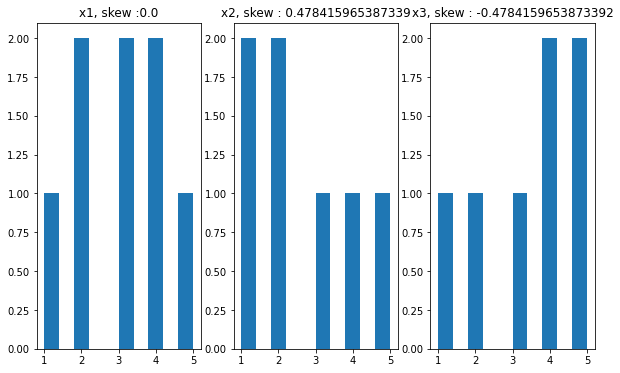

In [16]:
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]

plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.hist(x1)
plt.title(f'x1, skew :{skew(x1)}')

plt.subplot(1,3,2)
plt.hist(x2)
plt.title(f'x2, skew : {skew(x2)}')

plt.subplot(1,3,3)
plt.hist(x3)
plt.title(f'x3, skew : {skew(x3)}')

plt.show()

### **| 첨도(kurtosis)**


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-02.png?raw=true width=300>
</p>


\begin{align}
\text{kurtosis} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\end{align}

```
from scipy.stats import kurtosis
kurtosis(a)
```

In [17]:
kurtosis(a)

-0.0467663244783294

* 세개의 데이터의 분포를 그리고 각각의 첨도도 구해봅니다.

```
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]
```

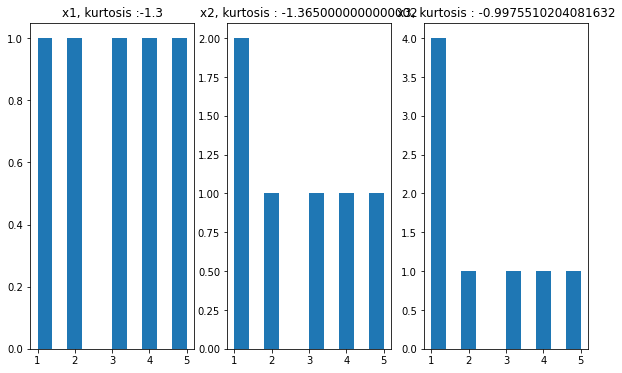

In [18]:
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]

plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.hist(x1)
plt.title(f'x1, kurtosis :{kurtosis(x1)}')

plt.subplot(1,3,2)
plt.hist(x2)
plt.title(f'x2, kurtosis : {kurtosis(x2)}')

plt.subplot(1,3,3)
plt.hist(x3)
plt.title(f'x3, kurtosis : {kurtosis(x3)}')

plt.show()

## 예제
---

#### **예제 01**

1. 지난 시간에 배운 scipy 라이브러리의 gamma 함수를 사용합니다. 

2. a값이 4인 감마함수로 부터 표본을 1000개 추출하고 `x3`로 바인딩합니다.

4. a값이 12인 감마함수로 부터 표본을 1000개 추출하고 `x4`로 바인딩합니다.

6. `x3`의 모든 요소에 -1을 곱한 후 `x2`로 바인딩합니다.

6. `x4`의 모든 요소에 -1을 곱한 후 `x1`로 바인딩합니다.

7. `x1, x2, x3, x4`의 분포를 각각 그립니다.

7. `x1, x2, x3, x4`의 왜도를 각각 구합니다.

7. `x1, x2, x3, x4`의 첨도를 각각 구합니다.


In [19]:
import scipy as sp

In [25]:
gam1 = sp.stats.gamma(4,1)
gam2 = sp.stats.gamma(12,1)
x3 = gam1.rvs(1000)
x4 = gam2.rvs(1000)
x1 = x4*-1
x2 = x3*-1

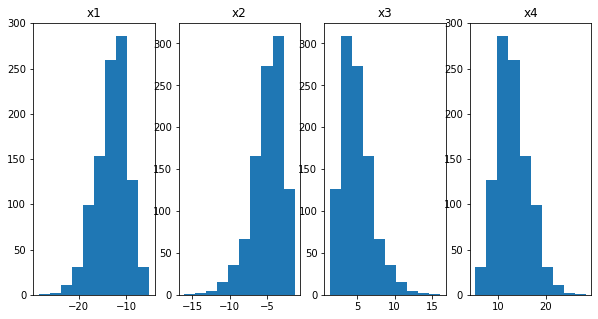

x1 skew : -0.571893148231549, kurtosis : 0.5345106837605207
x2 skew : -1.1476296157008135, kurtosis : 1.991695288425107
x3 skew : 1.1476296157008135, kurtosis : 1.991695288425107
x4 skew : 0.571893148231549, kurtosis : 0.5345106837605207


In [32]:
plt.figure(figsize=(10,5))

plt.subplot(1,4,1)
plt.hist(x1)
plt.title('x1')

plt.subplot(1,4,2)
plt.hist(x2)
plt.title('x2')

plt.subplot(1,4,3)
plt.hist(x3)
plt.title('x3')

plt.subplot(1,4,4)
plt.hist(x4)
plt.title('x4')
plt.show()

print(f'x1 skew : {skew(x1)}, kurtosis : {kurtosis(x1)}')
print(f'x2 skew : {skew(x2)}, kurtosis : {kurtosis(x2)}')
print(f'x3 skew : {skew(x3)}, kurtosis : {kurtosis(x3)}')
print(f'x4 skew : {skew(x4)}, kurtosis : {kurtosis(x4)}')

#### **예제 02**

타이타닉 데이터셋을 가져오고, 수치자료형 변수들의 **산포통계**와 **분포통계**를 정리하세요.

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
df = pd.read_csv('/content/drive/MyDrive/딥러닝 프레임워크 실무/SkillTreePython-DataAnalysis-main/data/타이타닉,샌프란시스코,킥보드 시험/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
column = []
for i in df.columns :                   # 수치형 자료가 있는 컬럼들만 남김.
  if '64' in str(df[i].dtype) :
    column.append(i)
df1 = df[column]
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [66]:
df1.describe()           # 수치형 자료들만 있는 df1의 통계량들.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
# 왜도와 첨도를 describe()의 행에 추가

list1 = []
list2 = []
for i in df1.columns :
  list1.append(skew(df1[i]))
  list2.append(kurtosis(df1[i]))

dict1 = {'skew' : list1, 'kurtosis' : list2}
df_dict1 = pd.DataFrame(dict1).T

In [93]:
df_dict1.columns = column
df_dict1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
skew,0.000000,0.477717,-0.629486,NaN,3.689128,2.744487,4.779253
kurtosis,-1.200003,-1.771786,-1.279570,NaN,17.773512,9.716613,33.204289


In [95]:
# 타이타닉의 수치형자료들의 통계량들

df1 = pd.concat([df1.describe(), df_dict1])
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,893.000000,893.000000,893.000000,714.000000,893.000000,893.000000,893.000000
mean,444.999776,0.381530,2.301334,29.699118,0.545871,0.394693,32.174617
std,257.931580,0.491381,0.849415,14.526497,1.248055,0.867210,49.646182
min,-1.200003,-1.771786,-1.279570,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,17.773512,9.716613,512.329200
skew,0.000000,0.477717,-0.629486,NaN,3.689128,2.744487,4.779253
kurtosis,-1.200003,-1.771786,-1.279570,NaN,17.773512,9.716613,33.204289
